# Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

In [1]:
#Steps:
# 1.Problem statement.
# 2.Loading libraries Data and Understanding.
# 3.Hypothesis Generation.
# 4.EDA (Univariate analysis + Bivariate analysis.)
# 5.Data cleaning - Missing values impute,Outlier treatment.
# 6.Feature Engineering.
# 7.Encoding categorical values.
# 8.PreProcessing Data(Removing Skewness,Scaling numeric features).
# 9.Model building.
# 10.Evaluating model.

# Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

# Loading Libraries,Data and Understanding data

In [2]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Importing Data
train=pd.read_csv("Big_Mart_Train.csv")
test=pd.read_csv("Big_Mart_test.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [7]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [9]:
#Combining both traina nd test for easy process as we dont have to do encoding,visualization differently on both.
#At the end we can split them into train and test again.
frames=[train,test]
df=pd.concat(frames)
df.shape

(14204, 12)

In [10]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Hypothesis Generation 

In [12]:
#Features whcih can affect our target variable.

In [13]:
#features which can affect target Item_Outlet_Sales are:
#Item_Type
#Item_MRP
#Item_Visibility
#Item_weight
#Outlet_Location_Type
#Outlet_Size
#Outlet_Type
#Outlet_Establishment_year

# Univariate analysis  

In [14]:
#Analysing features one by one :
#analysing  categorical variable :-bar plot
#analysing numerical variable : - histogram

Analysing target label:

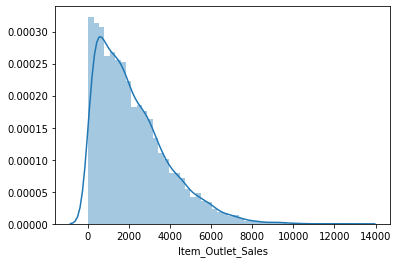

In [15]:
#As Item_Outlet_Sales is float,we can analyse it by plotting histogram/distribution density plot/box plot.
sns.distplot(df['Item_Outlet_Sales'])   #seaborn distribution density plot

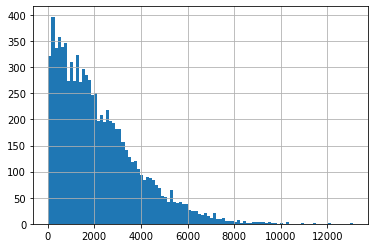

In [16]:
df['Item_Outlet_Sales'].hist(bins=100,fill='blue')

we can see that their is some right skewdness.So,we would have to treat its skewdness. 

Analysing numeric features using histogram:

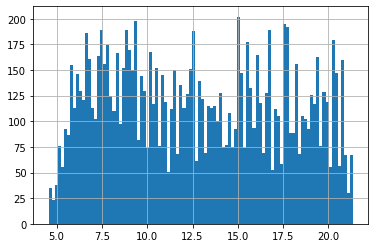

In [17]:
df['Item_Weight'].hist(bins=100)

We cam see, no clear cut pattern in Item_weight.

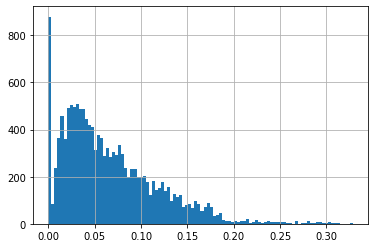

In [18]:
df['Item_Visibility'].hist(bins=100)

There is right skewdness and item cannot have zero visibility and need to be transformed.

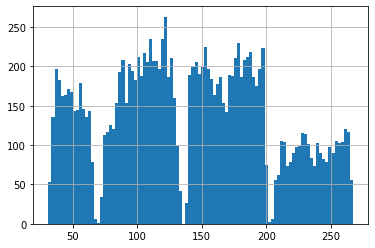

In [19]:
df['Item_MRP'].hist(bins=100)

There is 4 different patterns  for Item_MRP.

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64


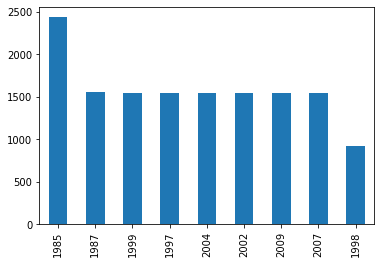

In [20]:
df['Outlet_Establishment_Year'].value_counts().plot.bar()
print(df['Outlet_Establishment_Year'].value_counts())

Analysing categorical feature:

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


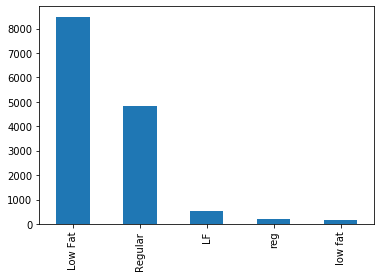

In [21]:
#Analysing Item_Fat_Content
df['Item_Fat_Content'].value_counts(dropna=False).plot.bar()
print(df['Item_Fat_Content'].value_counts(dropna=False))

In [22]:
#As low fat,Low Fat,LF are of same category.So it can be combined into one.
#Similarly for regular,reg
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True) 

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


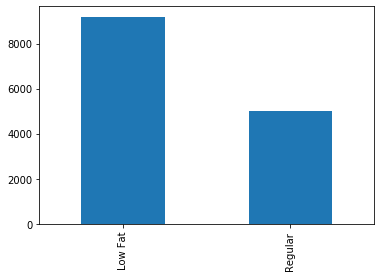

In [23]:
df['Item_Fat_Content'].value_counts().plot.bar()
print(df['Item_Fat_Content'].value_counts())

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


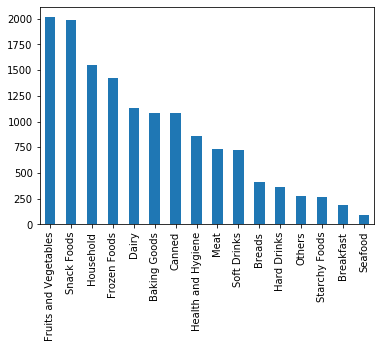

In [24]:
#Analysing Item_Type
print(df['Item_Type'].value_counts(dropna=False))
df['Item_Type'].value_counts(dropna=False).plot.bar()

OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


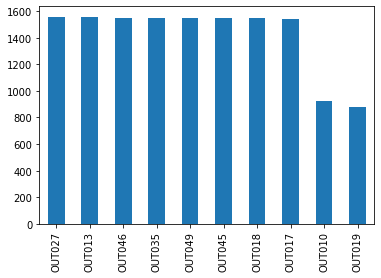

In [25]:
#Analysing Outlet_Identifier
print(df['Outlet_Identifier'].value_counts(dropna=False))
df['Outlet_Identifier'].value_counts(dropna=False).plot.bar()

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


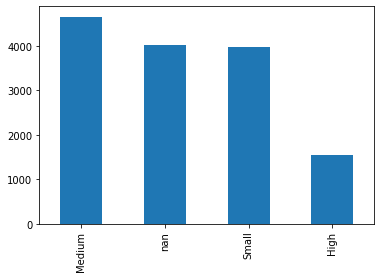

In [26]:
#Analysing Outlet_Size
print(df['Outlet_Size'].value_counts(dropna=False))
df['Outlet_Size'].value_counts(dropna=False).plot.bar()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


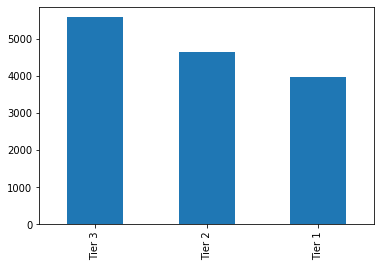

In [27]:
#Analysing Outlet_Location_Type
print(df['Outlet_Location_Type'].value_counts(dropna=False))
df['Outlet_Location_Type'].value_counts(dropna=False).plot.bar()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


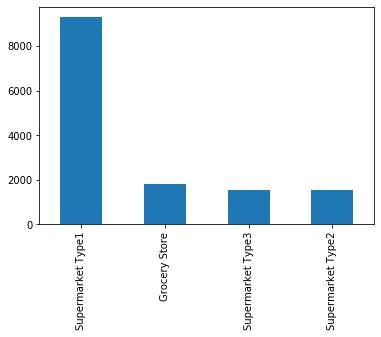

In [28]:
#Analysing Outlet_Type
print(df['Outlet_Type'].value_counts(dropna=False))
df['Outlet_Type'].value_counts(dropna=False).plot.bar()

#Final Analysis :
Item_Identifier               
Item_Weight                  deosnt matter much
Item_Fat_Content            low fat has more sales.
Item_Visibility              right skewdness
Item_Type                     Breakfast and snacks foods have high sales.
Item_MRP                      4 diffrent patterns
Outlet_Identifier             10,19 has less sales.
Outlet_Establishment_Year     1985 more,1998 has less.
Outlet_Size                   High has very less sales.
Outlet_Location_Type          doesnt matter much.
Outlet_Type                   Supermarket Type1 is most popular.
Item_Outlet_Sales             right skewdness.
dtype: object

# Bivariate Analysis 

In [29]:
#Here , we will analyse independent feature with respecct to target variable.
#for continous+continous variable -use scatter plot.
#For categorical+continous variable - boxplot.

Target label vs Numerical feature:

Text(0, 0.5, 'Item_Outlet_Sales')

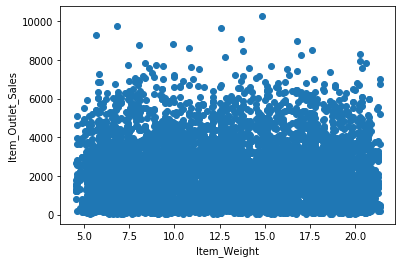

In [30]:
#Item_Weight vs Item_Outlet_Sales
plt.scatter(df['Item_Weight'],df['Item_Outlet_Sales'])
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")

Here,Item_Weight is spread across whole df.Their is no obvious pattern.

Text(0, 0.5, 'Item_Outlet_Sales')

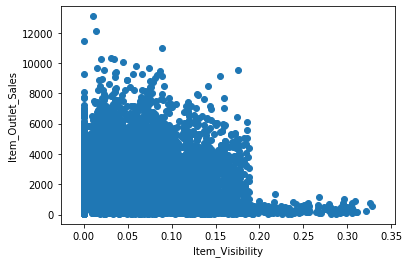

In [31]:
#Item_Visibility vs Item_Outlet_Sales
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")

tem_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.

Text(0, 0.5, 'Item_Outlet_Sales')

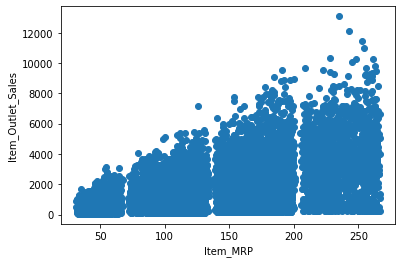

In [32]:
#Item_MRP vs Item_Outlet_Sales
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")

Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.


Target label vs Categorical feature:

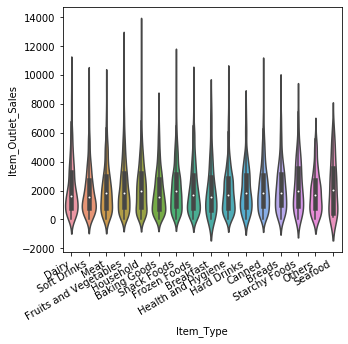

In [33]:
# Item_Type vs Item_Outlet_Sales
fig,ax=plt.subplots(figsize=(5,5))
sns.violinplot(ax=ax,x=df['Item_Type'],y=df['Item_Outlet_Sales'],dropna=False)
fig.autofmt_xdate()

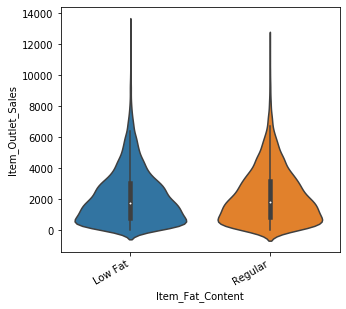

In [34]:
# Item_Fat_Content vs Item_Outlet_Sales
fig,ax=plt.subplots(figsize=(5,5))
sns.violinplot(ax=ax,x=df['Item_Fat_Content'],y=df['Item_Outlet_Sales'],dropna=False)
fig.autofmt_xdate()

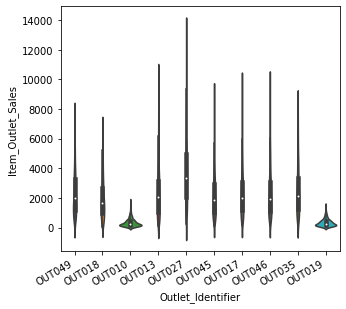

In [35]:
# Outlet_Identifier vs Item_Outlet_Sales
fig,ax=plt.subplots(figsize=(5,5))
sns.violinplot(ax=ax,x=df['Outlet_Identifier'],y=df['Item_Outlet_Sales'],dropna=False)
fig.autofmt_xdate()

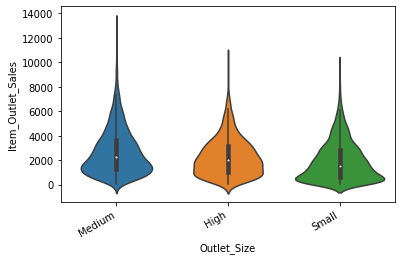

In [36]:
# Outlet_size vs Item_Outlet_Sales
fig,ax=plt.subplots()
sns.violinplot(ax=ax,x=df['Outlet_Size'],y=df['Item_Outlet_Sales'],dropna=False)
fig.autofmt_xdate()

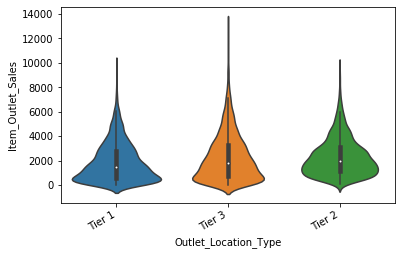

In [37]:
# Outlet_Location_Type vs Item_Outlet_Sales
fig,ax=plt.subplots()
sns.violinplot(ax=ax,x=df['Outlet_Location_Type'],y=df['Item_Outlet_Sales'],dropna=False)
fig.autofmt_xdate()

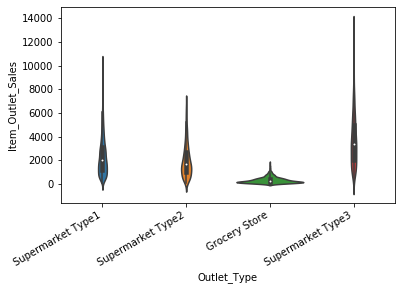

In [38]:
# Outlet_Type vs Item_Outlet_Sales
fig,ax=plt.subplots()
sns.violinplot(ax=ax,x=df['Outlet_Type'],y=df['Item_Outlet_Sales'],dropna=False)
fig.autofmt_xdate()

Observations

Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.

In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.

The distribution of ‘Small’ Outlet_Size is almost identical to the distribution of the blank category (first vioin) of Outlet_Size. So, we can substitute the blanks in Outlet_Size with ‘Small’.

Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.

The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.


# Data Cleaning (Missing values Impute)

In [39]:
#Finding out wjoch columns has missing values:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [40]:
#From bar grapgh of Outlet_Size , we analysed that missing values count is similar to small
df['Outlet_Size'].fillna("Small",inplace=True)
df["Outlet_Size"].value_counts(dropna=False)

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [41]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [42]:
#Imputing Item_Weight: Item weight doesnt have specific pattern.Thereforre,Impute it with mean.
df["Item_Weight"].fillna(df['Item_Weight'].mean(),inplace=True)

In [43]:
df["Item_Weight"].isnull().sum()

0

# Data cleaning (Outlier Treatment)

In [44]:
#Item_Visibility there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. 
#Therefore replacing 0 with mean of Item_Visibility grouping them  by Item_Identifer

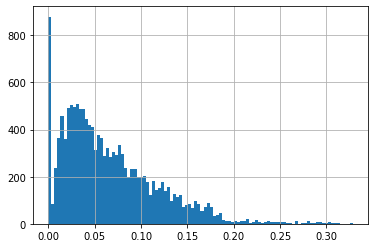

In [45]:
df['Item_Visibility'].hist(bins=100)

In [46]:
df["Item_Visibility"]=df.groupby(["Item_Identifier"])['Item_Visibility'].transform(lambda x: x.replace(0.0,x.mean()))

In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


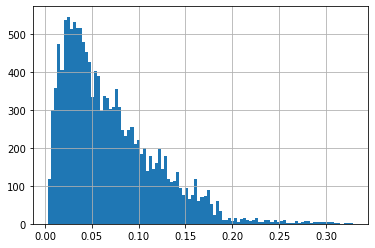

In [48]:
df['Item_Visibility'].hist(bins=100)

# Feature Engineering

In [49]:
#Feature Engineering :Creating new features which might help in improving the model’s performance.

# Encoding Categorical Variable

In [50]:
#Because Most of the machine learning algorithms produce better result with numerical variables only. 
#We have two techniques:
# 1.lABEL ENCODING : converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.
# 2.ONE HOT ENCODING:each category of a categorical variable is converted into a new binary column (1/0).

In [51]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [52]:
#So,we have :
#Categorical:Item_Identifier,Item_Fat_Content,Item_Type,Outlet_identifier,Outlet_Type
#Oridinal categorical var : Outlet_Size,Outlet_Location_Type 

Label Encoding for Ordinal Categorical Variable

In [53]:
#Label encoding outlet_Size: Small=0,Medium=1,High=2
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [54]:
df['Outlet_Size'].replace({"Small":0,"Medium":1,"High":2},inplace=True)

In [55]:
df['Outlet_Size'].unique()

array([1, 0, 2], dtype=int64)

In [56]:
#Similarly label encoding Outlet_Location_Type:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [57]:
df['Outlet_Location_Type'].replace({"Tier 1":0,"Tier 2":1,"Tier 3":2},inplace=True)

In [58]:
df['Outlet_Location_Type'].unique()

array([0, 2, 1], dtype=int64)

One hot Encoding for Categorical variable

In [59]:
#Item_Identifier,Item_Fat_Content,Item_Type,Outlet_identifier,Outlet_Type

In [60]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [61]:
df['Item_Type']=pd.get_dummies(df['Item_Type'])
df['Outlet_Type']=pd.get_dummies(df['Outlet_Type'])
df['Outlet_Establishment_Year']=pd.get_dummies(df['Outlet_Establishment_Year'])

In [62]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,0,249.8092,OUT049,0,1,0,0,3735.1380
1,DRC01,5.92,Regular,0.019278,0,48.2692,OUT018,0,1,2,0,443.4228
2,FDN15,17.50,Low Fat,0.016760,0,141.6180,OUT049,0,1,0,0,2097.2700
3,FDX07,19.20,Regular,0.017834,0,182.0950,OUT010,0,0,2,1,732.3800
4,NCD19,8.93,Low Fat,0.009780,0,53.8614,OUT013,0,2,2,0,994.7052


# PreProcessing Data (Removing skewness and Scaling numeric features)

Pre-processing refers to the transformations applied to your data before feeding it to the algorithm. It invloves further cleaning of data, data transformation, data scaling and many more things.

Removing Skewness:
Skewness in variables is undesirable for predictive modeling. 
Some machine learning methods assume normally distributed data and a skewed variable can be transformed by 
taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible. 

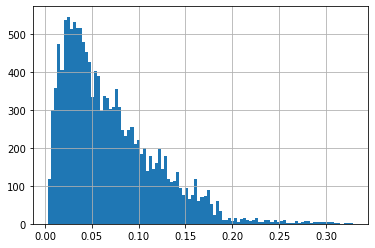

In [63]:
#Removing skewness of Item_Visibility(As its right skewd)
df['Item_Visibility'].hist(bins=100)

In [64]:
#Removign skewness by taking log transformation:
df['Item_Visibility'] = np.log(df['Item_Visibility']) 

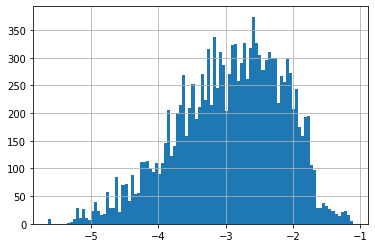

In [65]:
df['Item_Visibility'].hist(bins=100)

Scaling numeric features:
scale and center the numeric variables to make them have a mean of zero, standard deviation of one and scale of 0 to 1. 
Scaling and centering is required for linear regression models.

In [67]:
copy_df=df.copy()

In [82]:
#Splling the df into traina nd test:
train=df.loc[df['Item_Outlet_Sales'].notnull()]

In [83]:
test=df.loc[df['Item_Outlet_Sales'].isnull()]

In [112]:
test.drop('Item_Outlet_Sales',axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,-4.884245,0,107.8622,OUT049,0,1,0,0
1,FDW14,8.300000,Regular,-3.258977,0,87.3198,OUT017,0,0,1,0
2,NCN55,14.600000,Low Fat,-2.306845,0,241.7538,OUT010,0,0,2,1
3,FDQ58,7.315000,Low Fat,-4.174142,0,155.0340,OUT017,0,0,1,0
4,FDY38,12.792854,Regular,-2.132005,0,234.2300,OUT027,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,-4.305327,0,141.3154,OUT046,0,0,0,0
5677,FDD47,7.600000,Regular,-1.944974,0,169.1448,OUT018,0,1,2,0
5678,NCO17,10.000000,Low Fat,-2.610081,0,118.7440,OUT045,0,0,1,0
5679,FDJ26,15.300000,Regular,-2.426109,0,214.6218,OUT017,0,0,1,0


In [92]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,-4.132215,0,249.8092,OUT049,0,1,0,0,3735.1380
1,DRC01,5.92,Regular,-3.948780,0,48.2692,OUT018,0,1,2,0,443.4228


# Model Build

Linear Regression Model 

In [84]:
#importing linear regression from sklearn
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [93]:
#splitting the train file into training and validation 
# X = take only reqired columns

from sklearn.model_selection import train_test_split
X=train.loc[:,['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year','Outlet_Type']]
X_train,X_validate,y_train,y_validate=train_test_split(X,train.Item_Outlet_Sales)

In [94]:
#training the model
lreg.fit(X_train,y_train)
#predicting on validation
pred=lreg.predict(X_validate)

In [95]:
#calculating mse(mean squared error):
mse=np.mean((pred-y_validate)**2)
mse

1297939.833033705

In [97]:
#calculate r-square ":
lreg.score(X_validate,y_validate)

0.5386128778146988

In [100]:
# Compute the root-mean-square
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(pred,y_validate))
print(rmse)

1139.2716239043718


# Prediction on test dataset

In [127]:
final_results=lreg.predict(test[['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Establishment_Year','Outlet_Type']])

In [129]:
final_results

array([1635.70002852, 1504.32302045, 1515.70293023, ..., 1987.20858013,
       3483.77884528, 1371.08282549])